We will aim to detect fraud in credit card transactions using the Logistic Regression model. We will create our model with the Scikit-learn library, evaluate its performance with various metrics and interpret the ROC curve./Lojistik Regresyon modelini kullanarak kredi kartı işlemlerindeki dolandırıcılığı tespit etmeyi amaçlayacağız. Modelimizi Scikit-learn kütüphanesiyle oluşturacak, performansını çeşitli metriklerle değerlendirecek ve ROC eğrisini yorumlayacağız.

The class property is the target variable and takes two values: 1 in case of fraud, 0 otherwise. The dataset was obtained from Kaggle./Sınıf özelliği hedef değişkendir ve iki değer alır: dolandırıcılık durumunda 1, aksi takdirde 0. Veri seti Kaggle'dan alınmıştır.

In [45]:
import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
X = df.drop("Class", axis=1)
y = df["Class"]
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [50]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [51]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


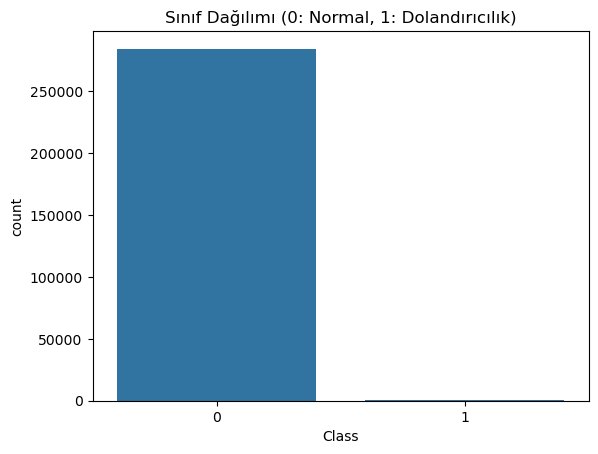

In [52]:
sns.countplot(x=y)
plt.title("Sınıf Dağılımı (0: Normal, 1: Dolandırıcılık)")
plt.show()

In [53]:
# Sınıf ağır biçimde dengesiz (imbalanced).
# Bu yüzden accuracy gibi metrikler yanıltıcı olur — model hep 0 dese bile %99 doğru görünür.

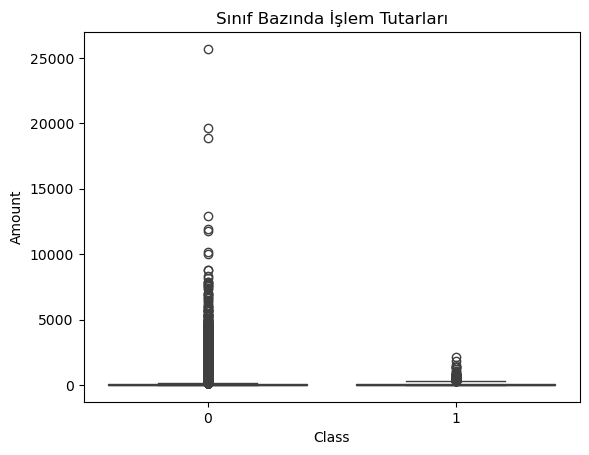

In [54]:
sns.boxplot(x=y, y=df['Amount'])
plt.title("Sınıf Bazında İşlem Tutarları")
plt.show()

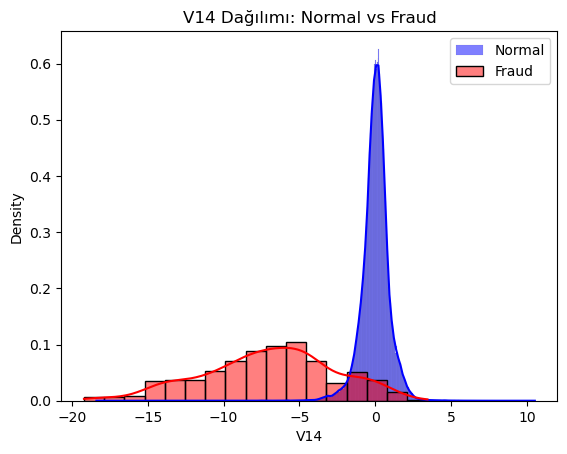

In [55]:
feature = 'V14'  # örnek bir değişken
sns.histplot(df[df['Class']==0][feature], color='blue', label='Normal', stat='density', kde=True)
sns.histplot(df[df['Class']==1][feature], color='red', label='Fraud', stat='density', kde=True)
plt.legend()
plt.title(f"{feature} Dağılımı: Normal vs Fraud")
plt.show()


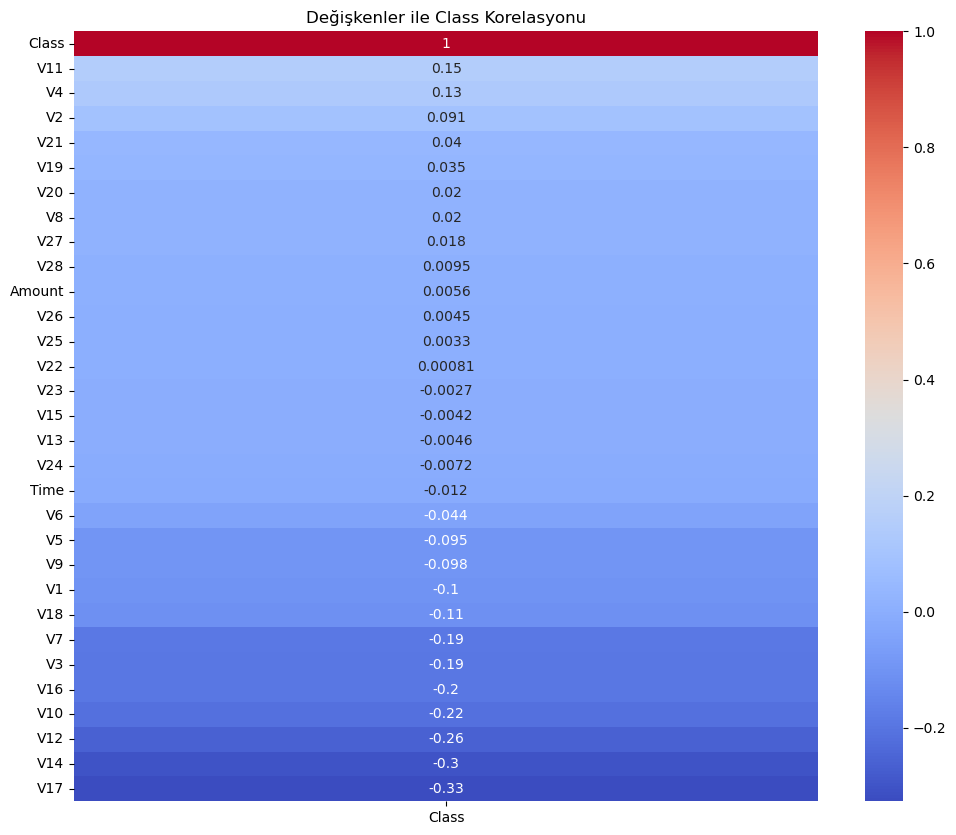

In [56]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Class']].sort_values(by='Class', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Değişkenler ile Class Korelasyonu")
plt.show()

V17 gibi değişkenlerin modele katkısı büyük olabilir.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [59]:
y_test.value_counts(normalize=True)

Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

In [60]:
y_train.value_counts(normalize=True)

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

In [61]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled X_train mean:", X_train_scaled.mean())
print("Scaled X_train std:", X_train_scaled.std())

print("Scaled X_test mean:", X_test_scaled.mean())
print("Scaled X_test std:", X_test_scaled.std())

Scaled X_train mean: -6.572053824836027e-18
Scaled X_train std: 1.0000000000000075
Scaled X_test mean: -0.00012671982874811637
Scaled X_test std: 1.0040070124461717


In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9991573329588147

In [64]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[56851,    13],
       [   35,    63]], dtype=int64)

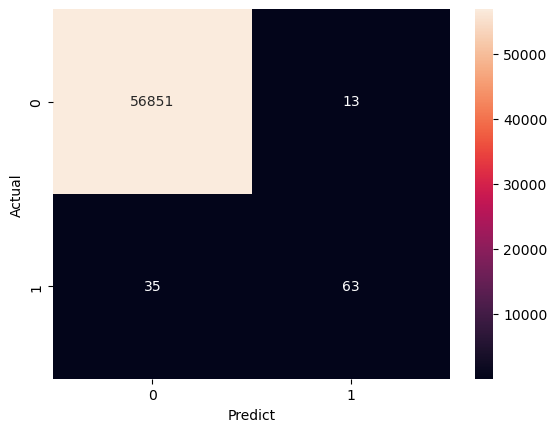

In [65]:
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [66]:
tp=conf_matrix[1,1]
tn=conf_matrix[0,0]
fp=conf_matrix[0,1]
fn=conf_matrix[1,0]
acc=(tp+tn)/(tp+tn+fp+fn)
pre=(tp)/(tp+fp)
rec=(tp)/(tp+fn)
f1=2*pre*rec/(pre+rec)
print("accuracy:",acc)
print("Precision:",pre)
print("Recall:",rec)
print("F1-Score:",f1)

accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1-Score: 0.7241379310344829


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("accuracy:",acc)
print("Precision:",pre)
print("Recall:",rec)
print("F1-Score:",f1)

accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1-Score: 0.7241379310344828


-(precision): When the model says “this transaction is a scam” it is usually right. This means that the false positive means the block is low./Model “bu işlem dolandırıcılık” dediğinde genelde doğru söylüyor.
This means that the rate of false positives is low./Bu, yanlış yere alarm verme (false positive) oranının düşük olduğu anlamına gelir.

Although the model's accuracy rate seems very high (99.9%), this value may be misleading due to class imbalance. While the Precision (83%) rate shows that the model is reliable in detecting fraudulent transactions, the Recall rate (64%) reveals that it misses some of the fraudulent transactions. In this case, if not missing the fraud is the priority instead of giving a false alarm, the model's threshold can be lowered and Recall can be increased. The F1-Score value of 72% shows that the model exhibits a balanced performance./Modelin doğruluk oranı çok yüksek (%99.9) görünse de, bu değer sınıf dengesizliğinden kaynaklı olarak yanıltıcı olabilir. Precision (%83) oranı modelin sahte işlem tespitlerinde güvenilir olduğunu gösterirken, Recall oranı (%64), dolandırıcılık işlemlerinin bir kısmını gözden kaçırdığını ortaya koymaktadır. Bu durumda, eğer hatalı alarm vermek yerine dolandırıcılığı kaçırmamak öncelikliyse, modelin eşiği düşürülerek Recall artırılabilir. F1-Score değerinin %72 olması, modelin dengeli bir performans sergilediğini gösterir.

In [71]:
y_pred_proba=model.predict_proba(X_test)[:,1]
y_pred=y_pred_proba>0.10

In [72]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[56832,    32],
       [   22,    76]], dtype=int64)

In [73]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("accuracy:",acc)
print("Precision:",pre)
print("Recall:",rec)
print("F1-Score:",f1)

accuracy: 0.9990519995786665
Precision: 0.7037037037037037
Recall: 0.7755102040816326
F1-Score: 0.7378640776699029


### ROC Curve

AUC Score: 0.9599474004570878


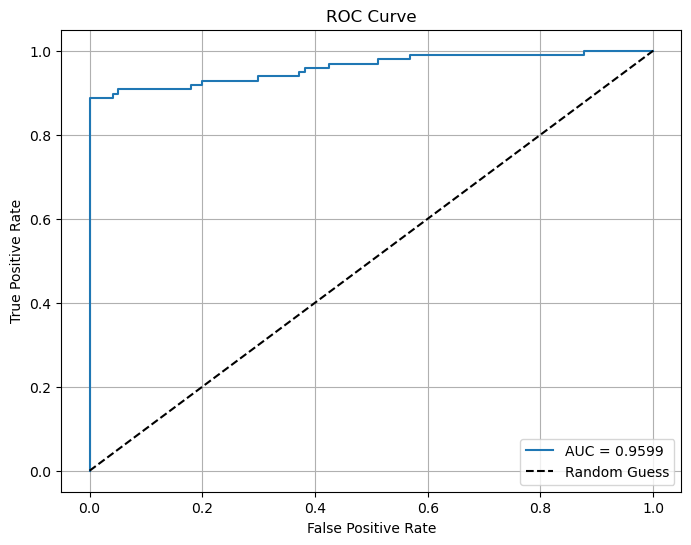

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

A score of AUC = 0.96 indicates that the model has high success in fraud detection. The proximity of the ROC curve to the upper left corner indicates that it provides both high sensitivity (Recall) and low false alarm rate. This is quite impressive for unstable and critical classification problems such as credit card fraud.
/AUC = 0.96 gibi bir skor, modelinin dolandırıcılık tespiti konusunda yüksek başarıya sahip olduğunu gösteriyor. ROC eğrisinin sol üst köşeye yakınlığı, hem yüksek duyarlılık (Recall), hem de düşük yanlış alarm oranı sağladığını gösterir. Bu da kredi kartı dolandırıcılığı gibi dengesiz ve kritik sınıflama problemleri için oldukça etkileyici bir sonuçtur.

In [75]:
def evaluate_model(model,X_train,X_test, y_train,y_test,threshold=0.5):
    model.fit(X_train,y_train)
    y_pred_proba=model.predict_proba(X_test)[:,1]
    y_pred=y_pred_proba>threshold
    acc=accuracy_score(y_test,y_pred)
    pre=precision_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    return acc,pre,rec

In [76]:
evaluate_model(model,X_train,X_test, y_train,y_test,threshold=0.15)

(0.9991046662687406, 0.7281553398058253, 0.7653061224489796)

In [77]:
thresholds=np.linspace(0.01,0.99,99)
results=[]
for threshold in thresholds:
    results.append(evaluate_model(model,X_train,X_test, y_train,y_test,threshold))
results=pd.DataFrame(results,columns=['accuracy','precision','recall'])
results['threshold']=thresholds
index=results['recall']>0.75
results[index]

,accuracy,precision,recall,threshold
0,0.997402,0.388393,0.887755,0.01
1,0.998560,0.550633,0.887755,0.02
2,0.998771,0.602941,0.836735,0.03
3,0.998894,0.637795,0.826531,0.04
4,0.998964,0.658537,0.826531,0.05
5,0.999034,0.680672,0.826531,0.06
6,0.999052,0.686441,0.826531,0.07
7,0.999052,0.692982,0.806122,0.08
8,0.999052,0.700000,0.785714,0.09
9,0.999052,0.703704,0.775510,0.10


Bu çalışmada, eşik değeri arttıkça modelin precision (doğruluk) oranı artarken recall (duyarlılık) oranı azalmaktadır. Bu durum, dolandırıcılık tespiti gibi dengesiz sınıflandırma problemlerinde beklenen bir eğilimdir. Uygulama amacına göre optimum eşik değeri seçilmeli; eğer güvenli tarafta kalmak istiyorsak düşük eşik, operasyonel verimlilik içinse daha yüksek eşik tercih edilmelidir. Bu analiz, modelin hassasiyet ve duyarlılık arasında tutarlı ve dengeli bir performans sergilediğini ortaya koymaktadır.